# Posterior distribution of approximated parameter 
### Compared to MCMC
### 95% HDI and MAP calculation for interpretable parameter

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import tensorflow as tf
import arviz as az

## Model tabular MFTMVI

In [3]:
model_1 = pd.read_csv('../thesis/tabularSlope+Intercept.csv')
wSILS = model_1["slope_weight"]
qwSILS = model_1["slope_density"]

bSILS = model_1 ["intercept_weight"]
qbSILS = model_1["intercept_density"]


##for calculating uncertainty range
sampleSILS = model_1["sampleW"]

# Model 1: CNN + TMVI TAB

In [5]:
m1 = pd.read_csv('../thesis/m1_slope.csv')
wOnlyTab = m1["slope_weight"]
qwOnlyTab = m1["slope_density"]

##for calculating uncertainty range
sampleOnlyTab = m1["sampleSlope"]

# Model 2: CNN MF TMVI + TAB MF TMVI

In [6]:
m2 = pd.read_csv('../thesis/m2_slope.csv')
wBoth = m2["slope_weight"]
qwBoth = m2["slope_density"]

##for calulating uncertainty range
sampleBoth = m2["SampleW"]

## MCMC slope

In [7]:
mcmc = pd.read_csv('../thesis/data/mcmcSampleTabular.csv')
sampleSlope = mcmc["slope"]
sampleIntercept = mcmc["intercept"]

## MCMC nullmodel

In [8]:
mcmcNull = pd.read_csv('../thesis/data/nullmodelMCMC.csv')
sampleNull = mcmcNull["sample"]

## MCMC fix intercept

In [9]:

mcmcFixSlope = pd.read_csv('../thesis/data/mcmcSample_fixIntercept.csv')
sampleFixSlope = mcmcFixSlope["sample"]

## TM-VI Null model

In [10]:
model_1 = pd.read_csv('../thesis/data/tabularNullmodel.csv')
wNull = model_1["weight"]
qwNull = model_1["density"]

In [11]:
## TM-VI fix intercept

In [12]:
model_1 = pd.read_csv('../thesis/data/tabularSlope_FixIntercept.csv')
wfix = model_1["weight"]
qwfix = model_1["density"]

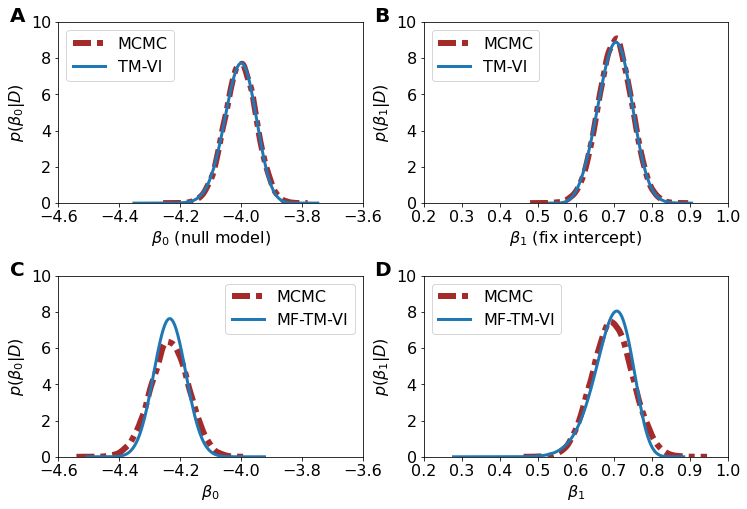

In [13]:
plt.figure(figsize=(12,8))
plt.rcParams.update(({'font.size': 16}))
plt.subplot(221)
sns.kdeplot(sampleNull, color='brown',zorder=2, label=r'MCMC',linewidth=6., linestyle=(0, (3, 1, 1, 1)))
plt.plot(wNull, qwNull, label ="TM-VI",linewidth=3.0)
plt.text(-4.76, 10,"A", 
            size=20, weight='bold')
plt.xlabel("$\\beta_0$ (null model)")
plt.ylabel("$p(\\beta_0|D)$")
plt.yticks(np.arange(0.0, 12, 2))
plt.xticks(np.arange(-4.6, -3.4, 0.2))

plt.legend()    
plt.subplot(222)
sns.kdeplot(sampleFixSlope, color='brown',zorder=2, label=r'MCMC',linewidth=6., linestyle=(0, (3, 1, 1, 1)))
plt.plot(wfix, qwfix, label ="TM-VI",linewidth=3.0)
plt.text(0.07, 10,"B", 
            size=20, weight='bold')
plt.ylabel("$p(\\beta_1|D)$")
plt.xlabel("$\\beta_1$ (fix intercept)")
plt.yticks(np.arange(0.0, 12, 2))
plt.xticks(np.arange(0.2, 1.1, 0.1))
plt.legend()
plt.subplots_adjust( hspace=0.4)
           
plt.subplot(223)
sns.kdeplot(sampleIntercept, color='brown',zorder=2, label=r'MCMC',linewidth=6., linestyle=(0, (3, 1, 1, 1)))
plt.plot(bSILS, qbSILS, label ="MF-TM-VI",linewidth=3.0)
plt.text(-4.76, 10,"C", 
            size=20, weight='bold')
plt.ylabel("$p(\\beta_0|D)$")
plt.xlabel("$\\beta_0$")
plt.yticks(np.arange(0.0, 12, 2))
plt.xticks(np.arange(-4.6, -3.4, 0.2))
plt.legend()
plt.subplot(224)
sns.kdeplot(sampleSlope, color='brown', zorder=2,label=r'MCMC',linewidth=6., linestyle=(0, (3, 1, 1, 1)))
plt.plot(wSILS, qwSILS, label ="MF-TM-VI",linewidth=3.0)
plt.text(0.07, 10,"D", 
            size=20, weight='bold')
plt.ylabel("$p(\\beta_1|D)$")
plt.xlabel("$\\beta_1$")
plt.yticks(np.arange(0.0, 12, 2))
plt.xticks(np.arange(0.2, 1.1, 0.1))
plt.legend()
#plt.savefig('./plots/uncertainty/tabularPosteriors.pdf')


plt.show()

Text(0, 0.5, 'p($\\beta_1$|D)')

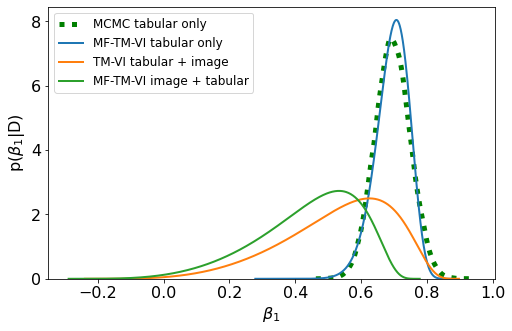

In [15]:
#### plot variational Distribution
#sns.reset_orig()
plt.figure(figsize=(8,5))
plt.rcParams.update(({'font.size': 16}))
sns.kdeplot(sampleSlope, color='g',zorder=2, label=r'MCMC tabular only',linewidth=5., linestyle=(0, (1, 1.5)))

plt.plot(wSILS, qwSILS, label ="MF-TM-VI tabular only ",linewidth=2.0)
plt.plot(wOnlyTab, qwOnlyTab, label ="TM-VI tabular + image",linewidth=2.0)
plt.plot(wBoth, qwBoth, label ="MF-TM-VI image + tabular",linewidth=2.0)


plt.legend(fontsize=12)
plt.xlabel("$\\beta_1$")
plt.ylabel("p($\\beta_1$|D)")
#plt.savefig("plots/Figure.pdf")

In [23]:
## calculate 95% HDI 
both = np.asarray(sampleBoth)
onlyTab =np.asarray(sampleOnlyTab)
SILS = np.asarray(sampleSILS)
tabInterval= az.hdi(SILS)
onlyTabInterval=az.hdi(onlyTab)
bothInterval = az.hdi(both)
tabInterval,onlyTabInterval,bothInterval

(array([0.60677415, 0.79209167]),
 array([0.20251447, 0.79063773]),
 array([0.14410558, 0.6894067 ]))

In [20]:
## calulate mode (=MAP)
counts, bins = np.histogram(sampleSILS, bins=20)
max_bin = np.argmax(counts)
sampleSILS_Mode =bins[max_bin:max_bin+2].mean()

counts, bins = np.histogram(sampleOnlyTab, bins=20)
max_bin = np.argmax(counts)
sampleOnlyTab_Mode =bins[max_bin:max_bin+2].mean()

counts, bins = np.histogram(sampleBoth, bins=20)
max_bin = np.argmax(counts)
sampleBoth_Mode =bins[max_bin:max_bin+2].mean()

In [21]:
sampleSILS_Mode,sampleOnlyTab_Mode,sampleBoth_Mode

(0.72645671, 0.5895488688500001, 0.50819445575)

No handles with labels found to put in legend.


Text(0, 0.5, 'p($\\beta_1$|D)')

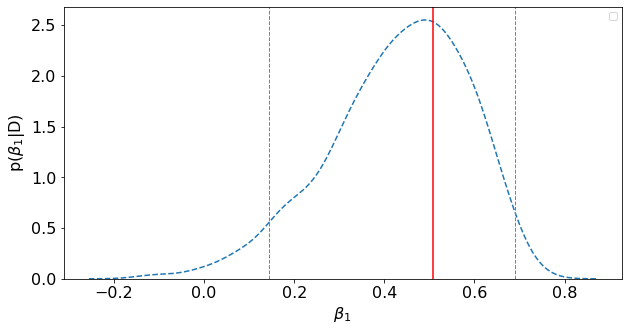

In [30]:
#### plot variational Distribution
plt.figure(figsize=(10,5))
plt.rcParams.update(({'font.size': 16}))


sns.kdeplot(sampleBoth,linestyle="--")
# high density intervals
plt.axvline(x=bothInterval[0], color='grey', linestyle='--', linewidth=1)
plt.axvline(x=bothInterval[1], color='grey', linestyle='--', linewidth=1)
plt.axvline(x=sampleBoth_Mode, color='r')

#plt.plot(w3, qw3, label ="CNN last layer Gaussian-VI + Gaussian-VI Age",linewidth=2.0)
plt.legend(fontsize=10)
#plt.title("Posterior distribution $p(\\beta_1|D)$")


plt.xlabel("$\\beta_1$")
plt.ylabel("p($\\beta_1$|D)")


In [3]:
%reload_ext version_information
%version_information tensorflow,numpy, pandas, matplotlib, arviz, seaborn

Software versions
Python 3.9.7 64bit [GCC 7.5.0]
IPython 7.27.0
OS Linux 5.8.0 63 generic x86_64 with glibc2.32
tensorflow 2.4.1
numpy 1.21.2
pandas 1.3.3
matplotlib 3.4.3
arviz 0.11.2
seaborn 0.11.2
Wed Nov 24 11:50:01 2021 CET